# 套件

In [1]:
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np

# 參數

In [137]:
# State Variables
T = 1
dt = 0.01
sigma = 0.1
S0 = 100
K=80 # Strike Price
a = 0.1
timestep = 12
length = 1 # in years
forward_rate = 0.05
day_count = ql.Thirty360()
todays_date = ql.Date(15, 1, 2015)
np.random.seed(1)

# 產生Short Rate

In [126]:
ql.Settings.instance().evaluationDate = todays_date

spot_curve = ql.FlatForward(todays_date, ql.QuoteHandle(ql.SimpleQuote(forward_rate)), day_count)
spot_curve_handle = ql.YieldTermStructureHandle(spot_curve)

In [127]:
hw_process = ql.HullWhiteProcess(spot_curve_handle, a, sigma)
rng = ql.GaussianRandomSequenceGenerator(ql.UniformRandomSequenceGenerator(timestep, ql.UniformRandomGenerator()))
seq = ql.GaussianPathGenerator(hw_process, length, timestep, rng, False)

In [152]:
def generate_paths(num_paths, timestep):
    arr = np.zeros((num_paths, timestep+1))
    for i in range(num_paths):
        sample_path = seq.next()
        path = sample_path.value()
        time = [path.time(j) for j in range(len(path))]
        value = [path[j] for j in range(len(path))]
        arr[i, :] = np.array(value)
    return np.array(time), arr

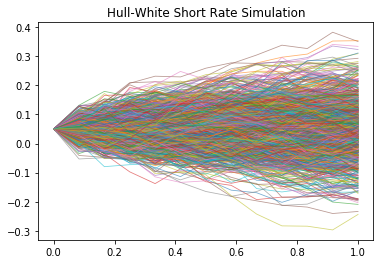

In [153]:
num_paths = 1000
time, paths = generate_paths(num_paths, timestep)
for i in range(num_paths):
    plt.plot(time, paths[i, :], lw=0.8, alpha=0.6)
plt.title("Hull-White Short Rate Simulation")
plt.show()

# 產生 geometric brownian motion

In [165]:
def genBrownPath (T, mu, sigma, S0, dt):    
    n = len(paths[1])
    t = np.linspace(0, T, n)
    W = [0] + np.random.standard_normal(size = n) 
    W = np.cumsum(W)*np.sqrt(dt) # == standard brownian motion
    X = (mu-0.5*sigma**2)*t + sigma*W 
    S = S0*np.exp(X) # == geometric brownian motion
    plt.plot(t, S)
    return S

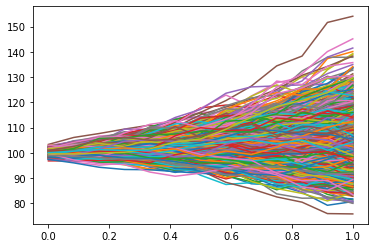

In [169]:
path = []
for i in range(num_paths):
    mu = paths[i]
    path.append(genBrownPath(T, mu, sigma, S0, dt))
plt.show()

# 計算出報酬

In [182]:
call_payoff=[]
put_payoff=[]
for i in path:
    call_payoff.append(max(i[-1]-K,0))
    put_payoff.append(max(K-i[-1],0))

In [184]:
call_expect=np.mean(call_payoff)
put_expect=np.mean(put_payoff)

In [185]:
call_present=call_expect/(1+forward_rate/12)**(12*length)
put_present=put_expect/(1+forward_rate/12)**(12*length)

# Call Price

In [186]:
print(call_present)

24.36670509662202


# Put Price

In [187]:
print(put_present)

0.003992550708234854
